# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Access the local file using python code

In [2]:
from google.colab import files
uploaded = files.upload()

Saving df_scaled.csv to df_scaled.csv


# Load the data set

In [5]:
df = pd.read_csv('df_scaled.csv')
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,Outlet_No.
0,10107222.0,Batticaloa,-0.347692,-0.308787,0.520598,1,1
1,10149531.0,Batticaloa,-0.347612,-0.211738,0.784676,1,1
2,10389466.0,Batticaloa,-0.347496,-0.367402,0.423406,1,1
3,10596077.0,Batticaloa,-0.347496,-0.271276,0.682146,1,1
4,10244123.0,Batticaloa,-0.347398,-0.301495,0.633288,1,1


**Using RobustScaler for outlier handling and better performance with scaling-sensitive algorithms like SVM or KNN.**

# Random Forest

In [7]:
df['cluster_catgeory'].value_counts()

,count
cluster_catgeory,
1,188982
4,172439
6,169215
2,155064
3,48907
5,39540


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Assigning input and output variables

In [9]:
# Define X and Y variables
x = df[['luxury_sales','fresh_sales','dry_sales','Outlet_No.']]
y = df['cluster_catgeory']

Since customer Id has no prediction value and is only a unique identifier it is not included in the features in the x dataframe since including it migh lead to over fitting the model.

# Data Split (70/30)

In [12]:
# test, train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Data dimension

In [13]:
print('Whole Data shape', df.shape)
print('X1_train shape', x_train.shape)
print('X1_test shape', x_test.shape)

Whole Data shape (774147, 7)
X1_train shape (541902, 4)
X1_test shape (232245, 4)


# Build clasification model

In [14]:
# creating the randome forest classifier (rfc)
clf = RandomForestClassifier(n_estimators=25, random_state=42)

n_estimators is the hyperparameter in random forest which tells the number of decision trees in the forest. Higher n_estimators mean higher accuracy but also higher computational cost and time. Therefore, 25 has been settled on as the balance between accuracy, computational cost as futher increase in this hyper parameter would only provide dimnishing returns.

# Train the model

In [15]:
# Train the model
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [16]:
# Predict using the x_test data
y_pred = clf.predict(x_test)

# Evaluate the model

In [18]:
MSE = mean_squared_error(y_test, y_pred)
r2_= r2_score(y_test, y_pred)
Acs = accuracy_score(y_test, y_pred)

print(f"MSE:{MSE}")
print(f"R2:{r2_}")
print(f"Accuracy:{Acs}")

MSE:0.011281190122499946
R2:0.9967602433700853
Accuracy:0.9990139723137205


# Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[56616,     0,     3,    21,     1,     5],
       [    1, 46385,     1,     3,     0,    49],
       [    1,     2, 14778,     0,     2,     0],
       [   29,     1,     1, 51867,     3,     2],
       [    0,     3,    21,     6, 11700,     2],
       [    0,    64,     4,     2,     2, 50670]])

# Heatmap of confusion matrix

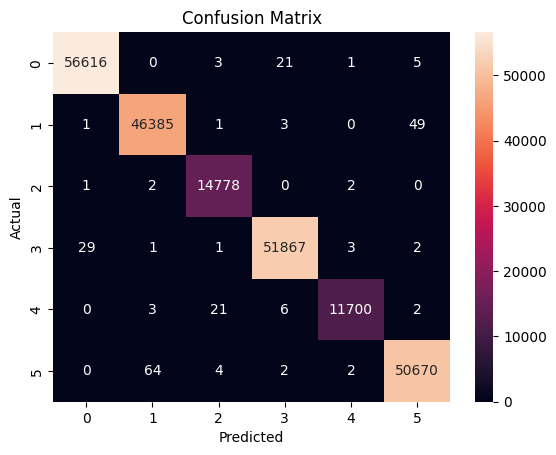

In [16]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance

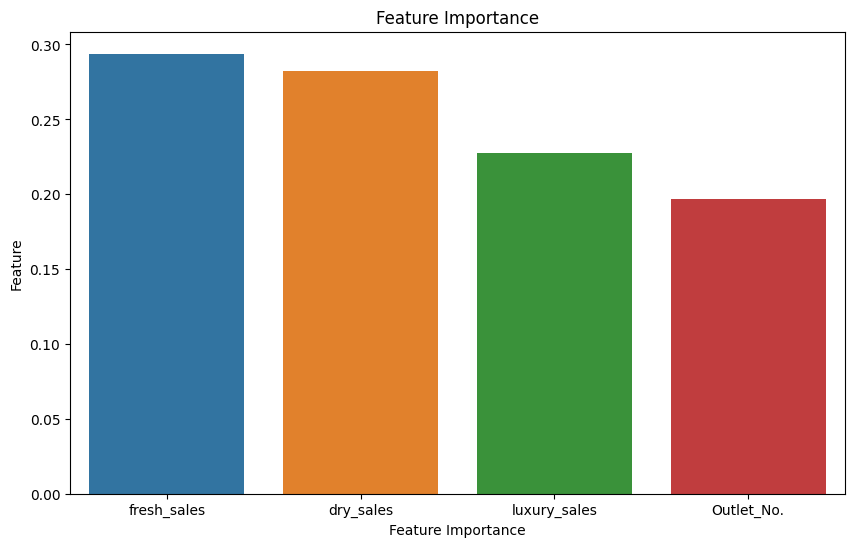

In [19]:
# importance of each feature
feature_importance = clf.feature_importances_
features = x_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(y='Importance', x='Feature', data=importance_df, hue='Feature')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Classification report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56646
           2       1.00      1.00      1.00     46439
           3       1.00      1.00      1.00     14783
           4       1.00      1.00      1.00     51903
           5       1.00      1.00      1.00     11732
           6       1.00      1.00      1.00     50742

    accuracy                           1.00    232245
   macro avg       1.00      1.00      1.00    232245
weighted avg       1.00      1.00      1.00    232245



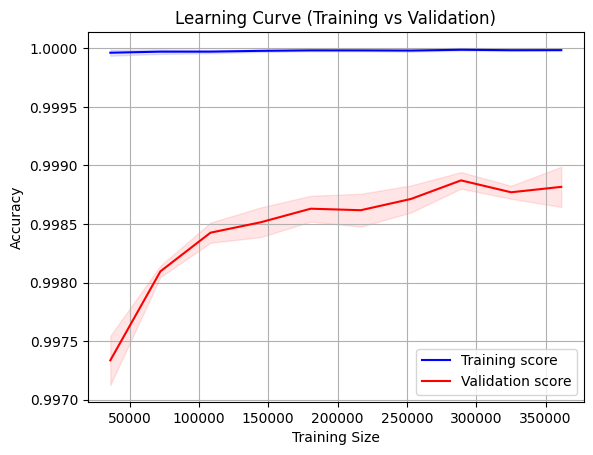

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

best_model = clf

# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    best_model, x_train, y_train, cv=3, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation for train and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(validation_scores, axis=1)
val_std = np.std(validation_scores, axis=1)

# Plotting the learning curve
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, val_mean, label="Validation score", color="red")

# Fill the area between the mean +/- 1 std
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Training vs Validation)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Cross Validation

In [23]:
# cross validation
# Perform 5-Fold Cross-Validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')

print("Random Forest CV Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Random Forest CV Accuracy Scores: [0.99887434 0.99901274 0.99914191 0.99901273 0.99885588]
Mean Accuracy: 0.9989795204150516
Standard Deviation: 0.00010481098089879719
